In [1]:
#Cars4U.py
#Author: Kyle Larson
#Project for Analyzing Used Cars Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(30,18)})
used_cars_data=pd.read_csv("used_cars_data.csv")

In [2]:
used_cars_data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
used_cars_data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
#Look at the mileage on that car! 6.5 million km is 4.03891 million miles
print("Max mileage (km):")
print(used_cars_data['Kilometers_Driven'].max())
print('\n')
maxmiles=used_cars_data['Kilometers_Driven'].idxmax()
print(used_cars_data.iloc[maxmiles])

Max mileage (km):
6500000


S.No.                                     2328
Name                 BMW X5 xDrive 30d M Sport
Location                               Chennai
Year                                      2017
Kilometers_Driven                      6500000
Fuel_Type                               Diesel
Transmission                         Automatic
Owner_Type                               First
Mileage                             15.97 kmpl
Engine                                 2993 CC
Power                                  258 bhp
Seats                                        5
New_Price                                  NaN
Price                                       65
Name: 2328, dtype: object


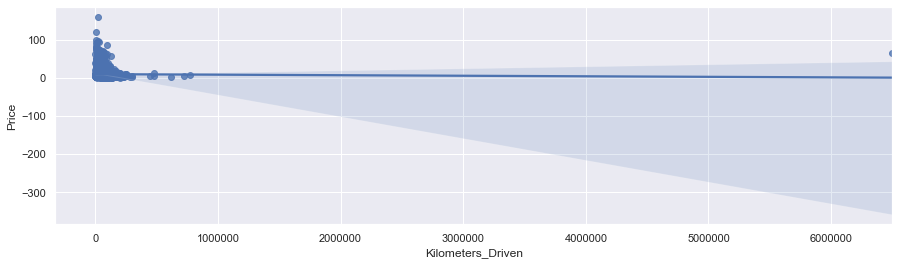

In [5]:
#Km vs Price, the oh crap this data is dirty image
plt.figure(figsize=(15,4))
sns.regplot(data=used_cars_data, x="Kilometers_Driven", y="Price" )

In [6]:
#Outlier Cutoffs
quantitative=['S.No.','Year','Kilometers_Driven','Seats','Price']
seventy_fifth=[5439.000000,2016.000000,7.300000e+04,5.000000,9.950000]
twenty_fifth=[1813.000000,2011.000000,3.400000e+04,5.000000,3.500000]
cutoffs, upperco, lowerco =[],[],[]
for i in range(len(seventy_fifth)): cutoffs.append( (seventy_fifth[i] - twenty_fifth[i])*1.5 ) 
for i in range(len(seventy_fifth)): upperco.append( seventy_fifth[i] + cutoffs[i] ) 
for i in range(len(seventy_fifth)): lowerco.append( twenty_fifth[i] - cutoffs[i] ) 

print("Outliers fall below:")

print(lowerco)
print("Outliers extend above:")
print(upperco)

print(quantitative)
#you will see that though it doesn't make sense to cal outlier by S.No 
#outliers exist for Year, Kilometers Driven, Seats and Price 

Outliers fall below:
[-3626.0, 2003.5, -24500.0, 5.0, -6.174999999999999]
Outliers extend above:
[10878.0, 2023.5, 131500.0, 5.0, 19.625]
['S.No.', 'Year', 'Kilometers_Driven', 'Seats', 'Price']


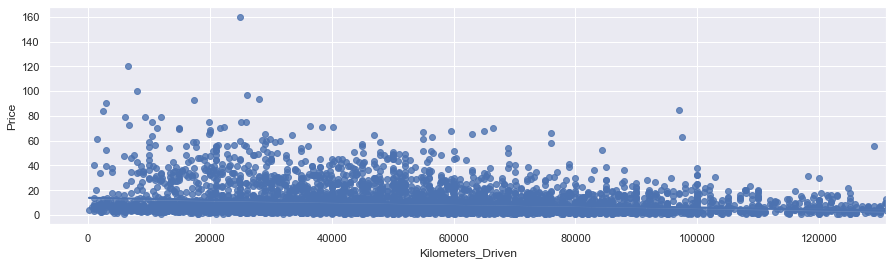

In [7]:
#getting rid of the outliers:

outliers, used_cars_minus_outliers  = [x for _, x in used_cars_data.groupby(used_cars_data['Kilometers_Driven'] < 131500)]

#plotting:
plt.figure(figsize=(15,4))
sns.regplot(data=used_cars_minus_outliers, x="Kilometers_Driven", y="Price")
# it seems that it would be appropriate to apply a relatonship to all cars under 131500 
# for the reason that the rest are outliers

[Text(0, 0, '1996'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

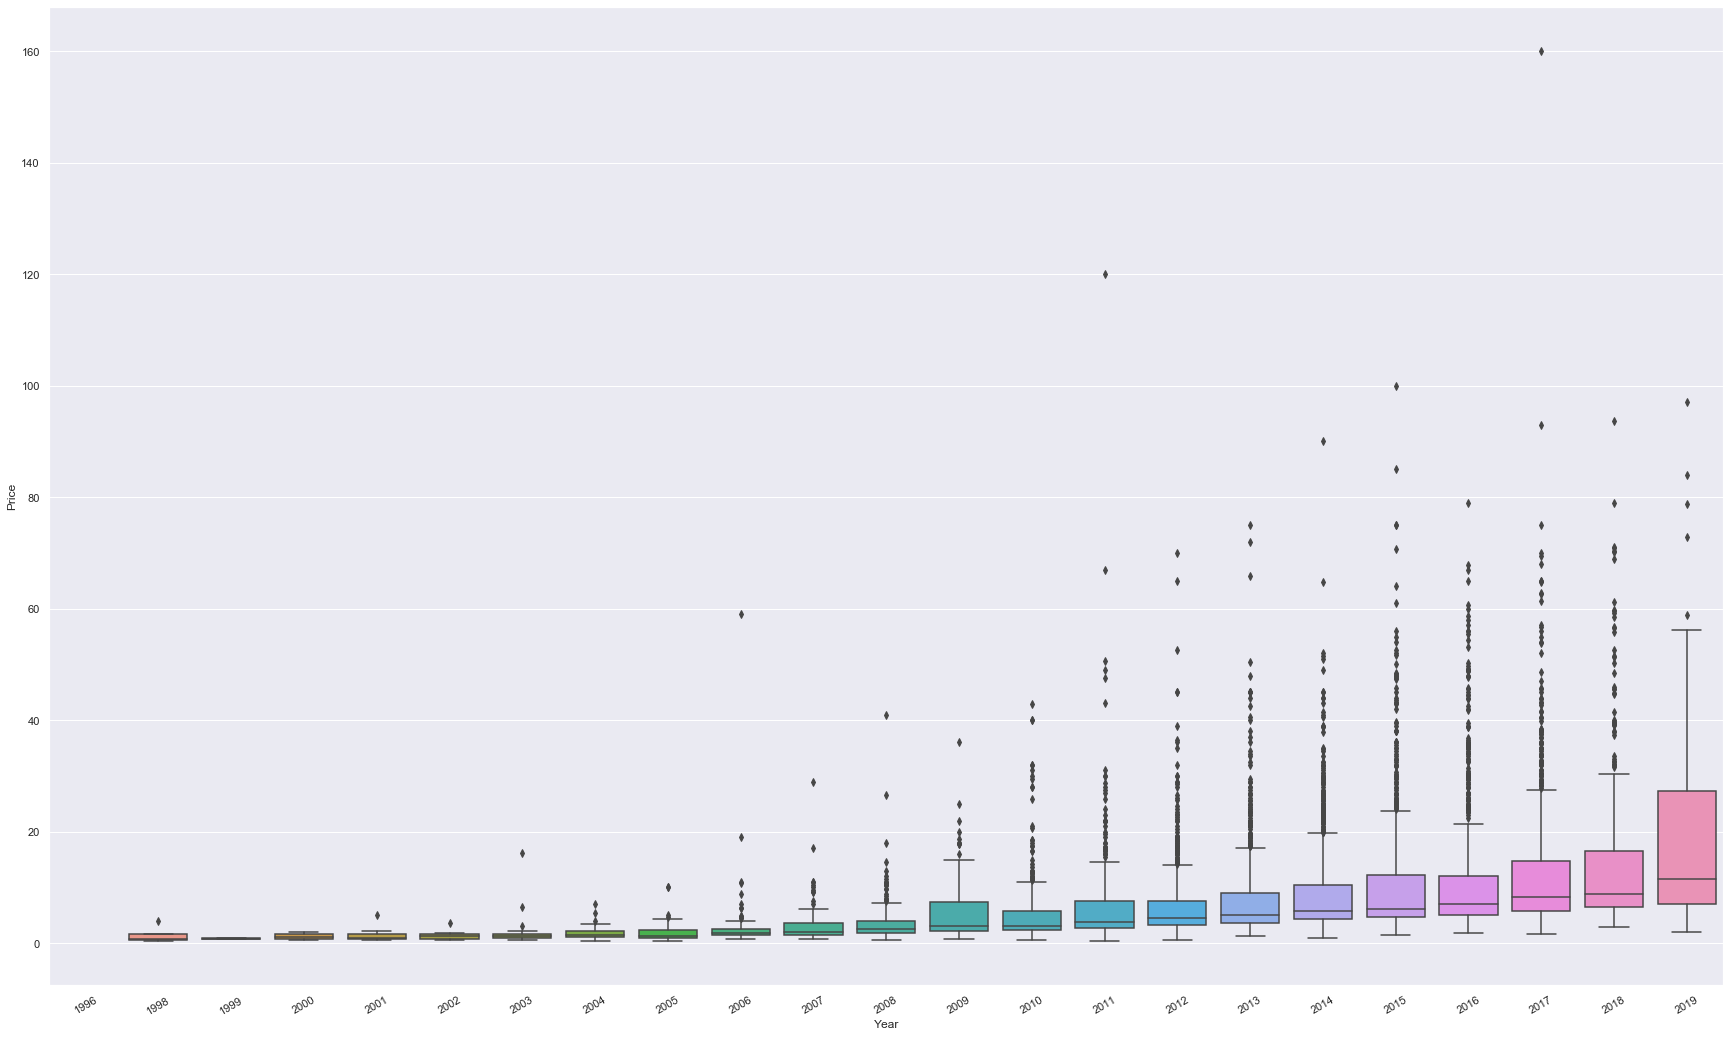

In [8]:
#Year vs Price
ax = sns.boxplot(x="Year", 
            y="Price", 
            data=used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [9]:
#Process By Manufacturer

first_word = lambda s: s.split()[0]

copy_used_cars_data = used_cars_data.copy()

copy_used_cars_data['Name'] = copy_used_cars_data['Name'].apply(first_word)

[Text(0, 0, 'Maruti'),
 Text(0, 0, 'Hyundai'),
 Text(0, 0, 'Honda'),
 Text(0, 0, 'Audi'),
 Text(0, 0, 'Nissan'),
 Text(0, 0, 'Toyota'),
 Text(0, 0, 'Volkswagen'),
 Text(0, 0, 'Tata'),
 Text(0, 0, 'Land'),
 Text(0, 0, 'Mitsubishi'),
 Text(0, 0, 'Renault'),
 Text(0, 0, 'Mercedes-Benz'),
 Text(0, 0, 'BMW'),
 Text(0, 0, 'Mahindra'),
 Text(0, 0, 'Ford'),
 Text(0, 0, 'Porsche'),
 Text(0, 0, 'Datsun'),
 Text(0, 0, 'Jaguar'),
 Text(0, 0, 'Volvo'),
 Text(0, 0, 'Chevrolet'),
 Text(0, 0, 'Skoda'),
 Text(0, 0, 'Mini'),
 Text(0, 0, 'Fiat'),
 Text(0, 0, 'Jeep'),
 Text(0, 0, 'Smart'),
 Text(0, 0, 'Ambassador'),
 Text(0, 0, 'Isuzu'),
 Text(0, 0, 'ISUZU'),
 Text(0, 0, 'Force'),
 Text(0, 0, 'Bentley'),
 Text(0, 0, 'Lamborghini'),
 Text(0, 0, 'Hindustan'),
 Text(0, 0, 'OpelCorsa')]

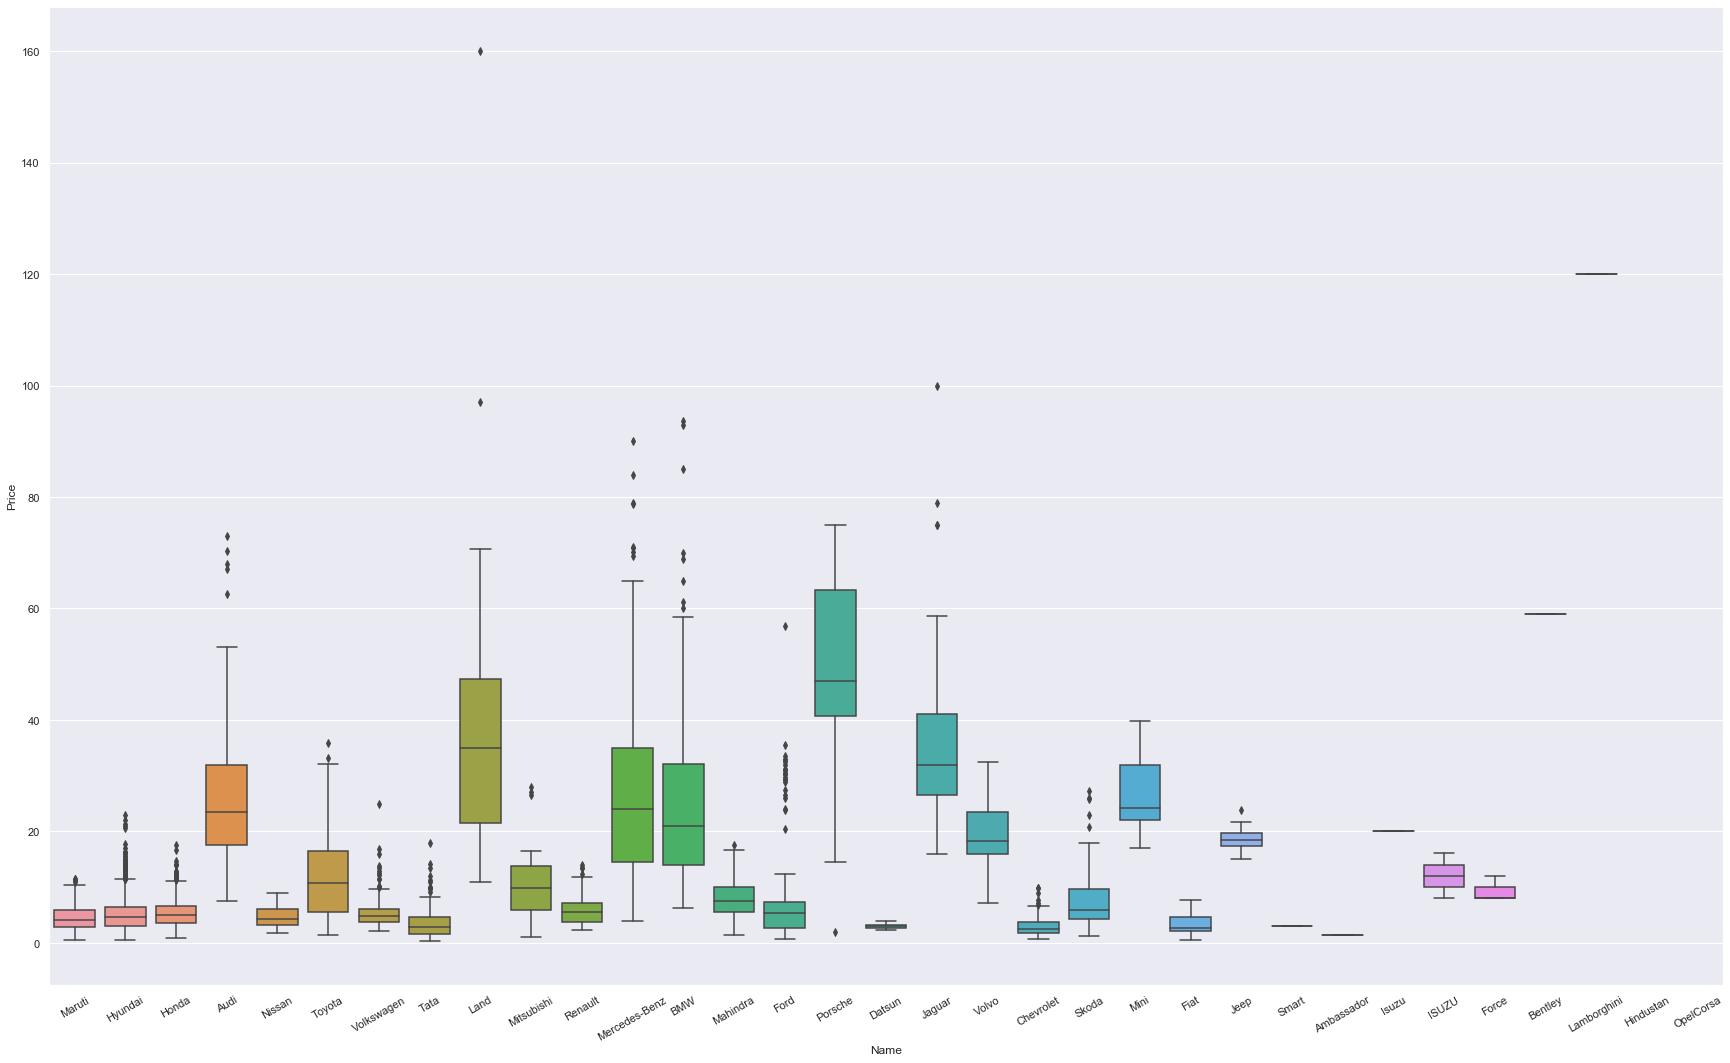

In [10]:
ax = sns.boxplot(x="Name", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmedabad')]

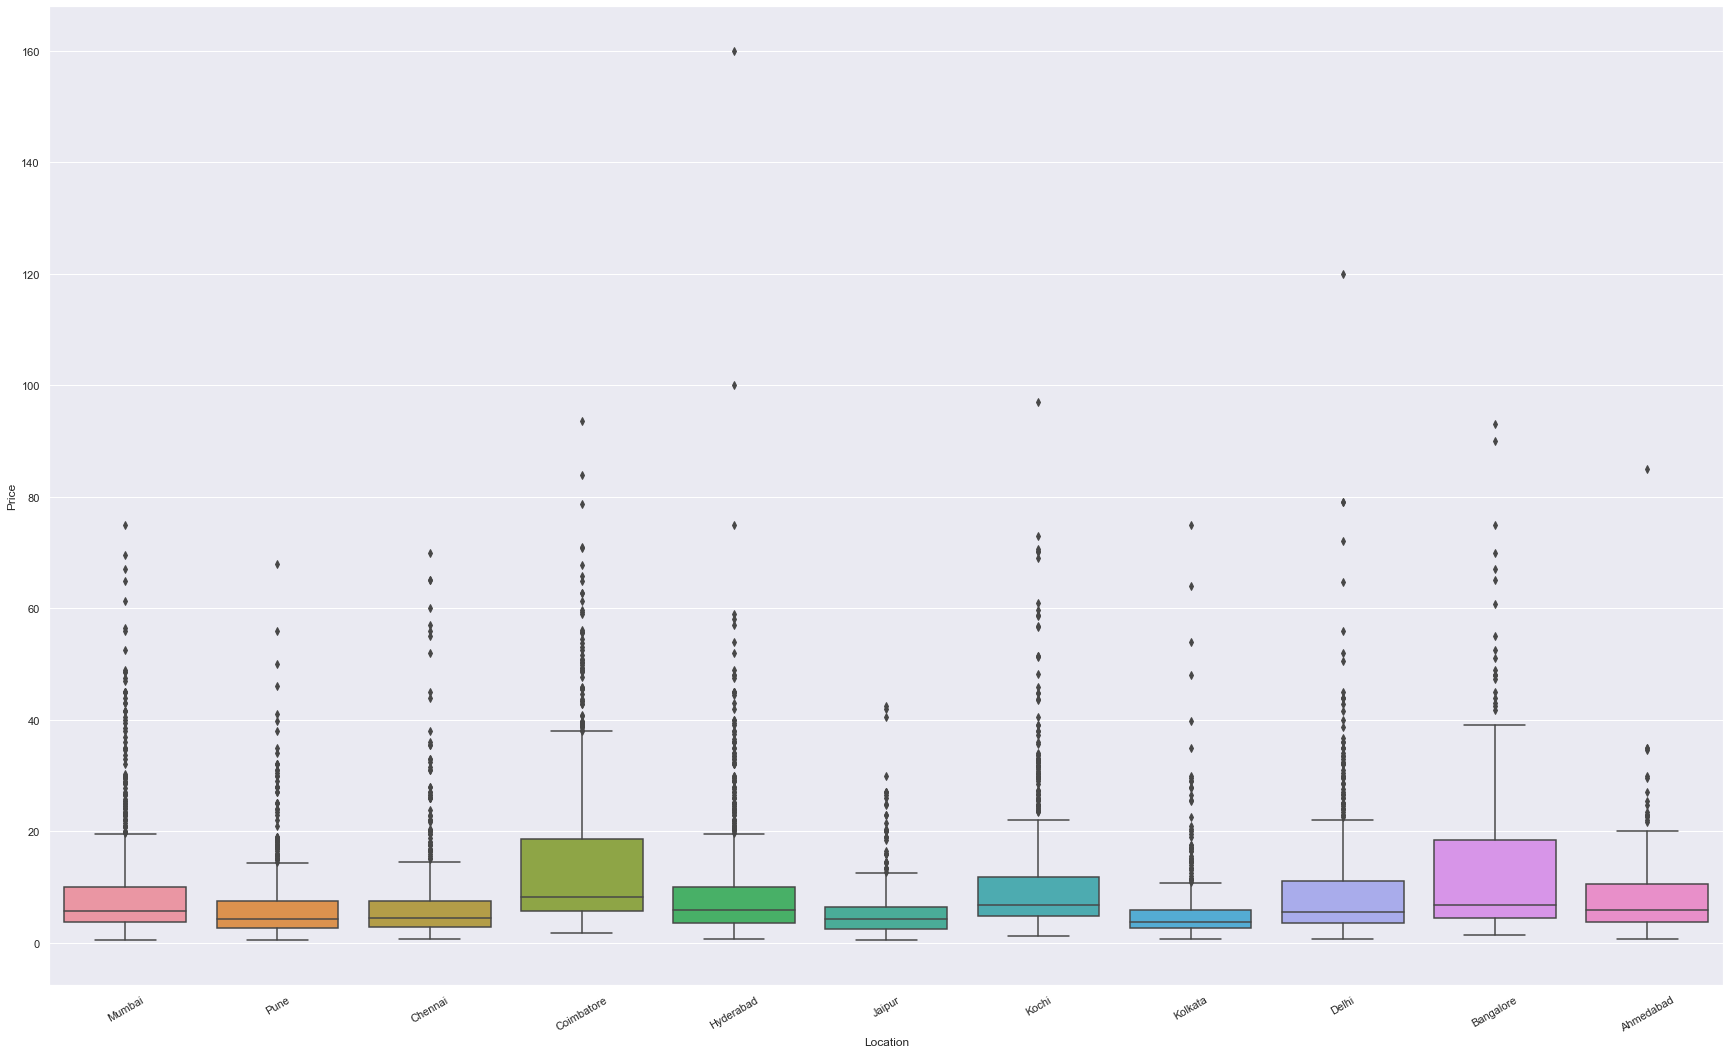

In [11]:
# by location
ax = sns.boxplot(x="Location", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'CNG'),
 Text(0, 0, 'Diesel'),
 Text(0, 0, 'Petrol'),
 Text(0, 0, 'LPG'),
 Text(0, 0, 'Electric')]

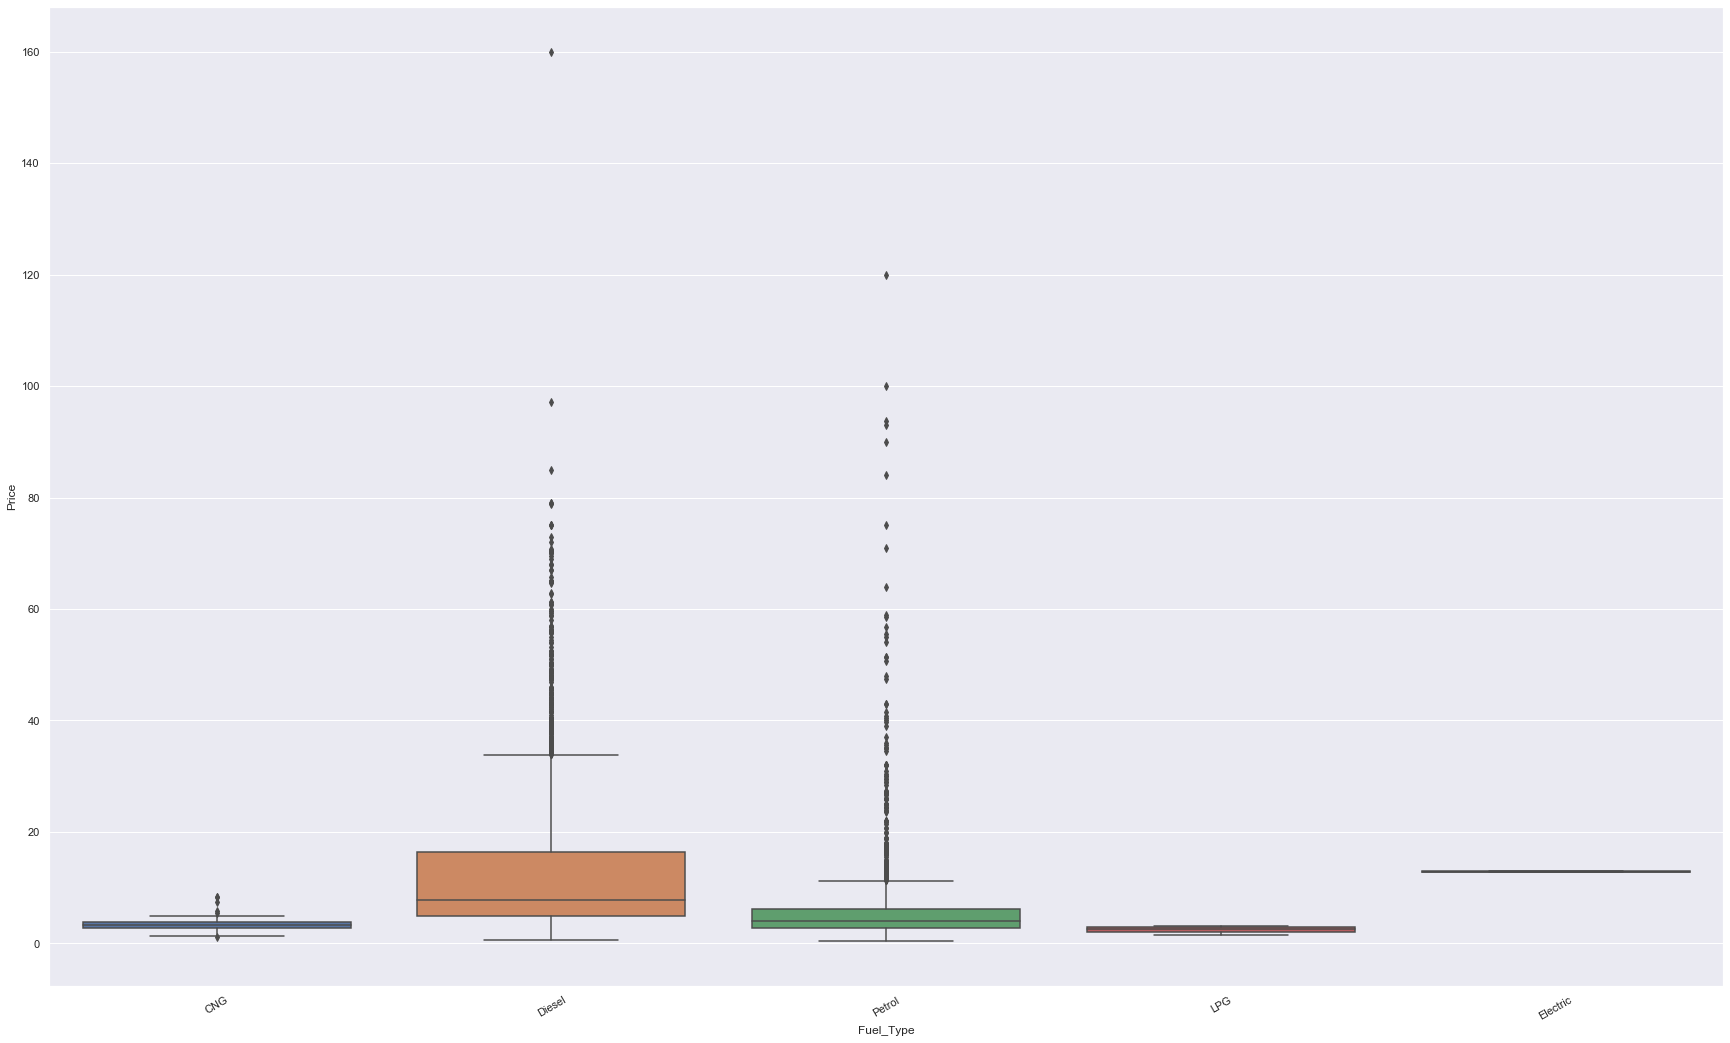

In [12]:
ax = sns.boxplot(x="Fuel_Type", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'First'),
 Text(0, 0, 'Second'),
 Text(0, 0, 'Fourth & Above'),
 Text(0, 0, 'Third')]

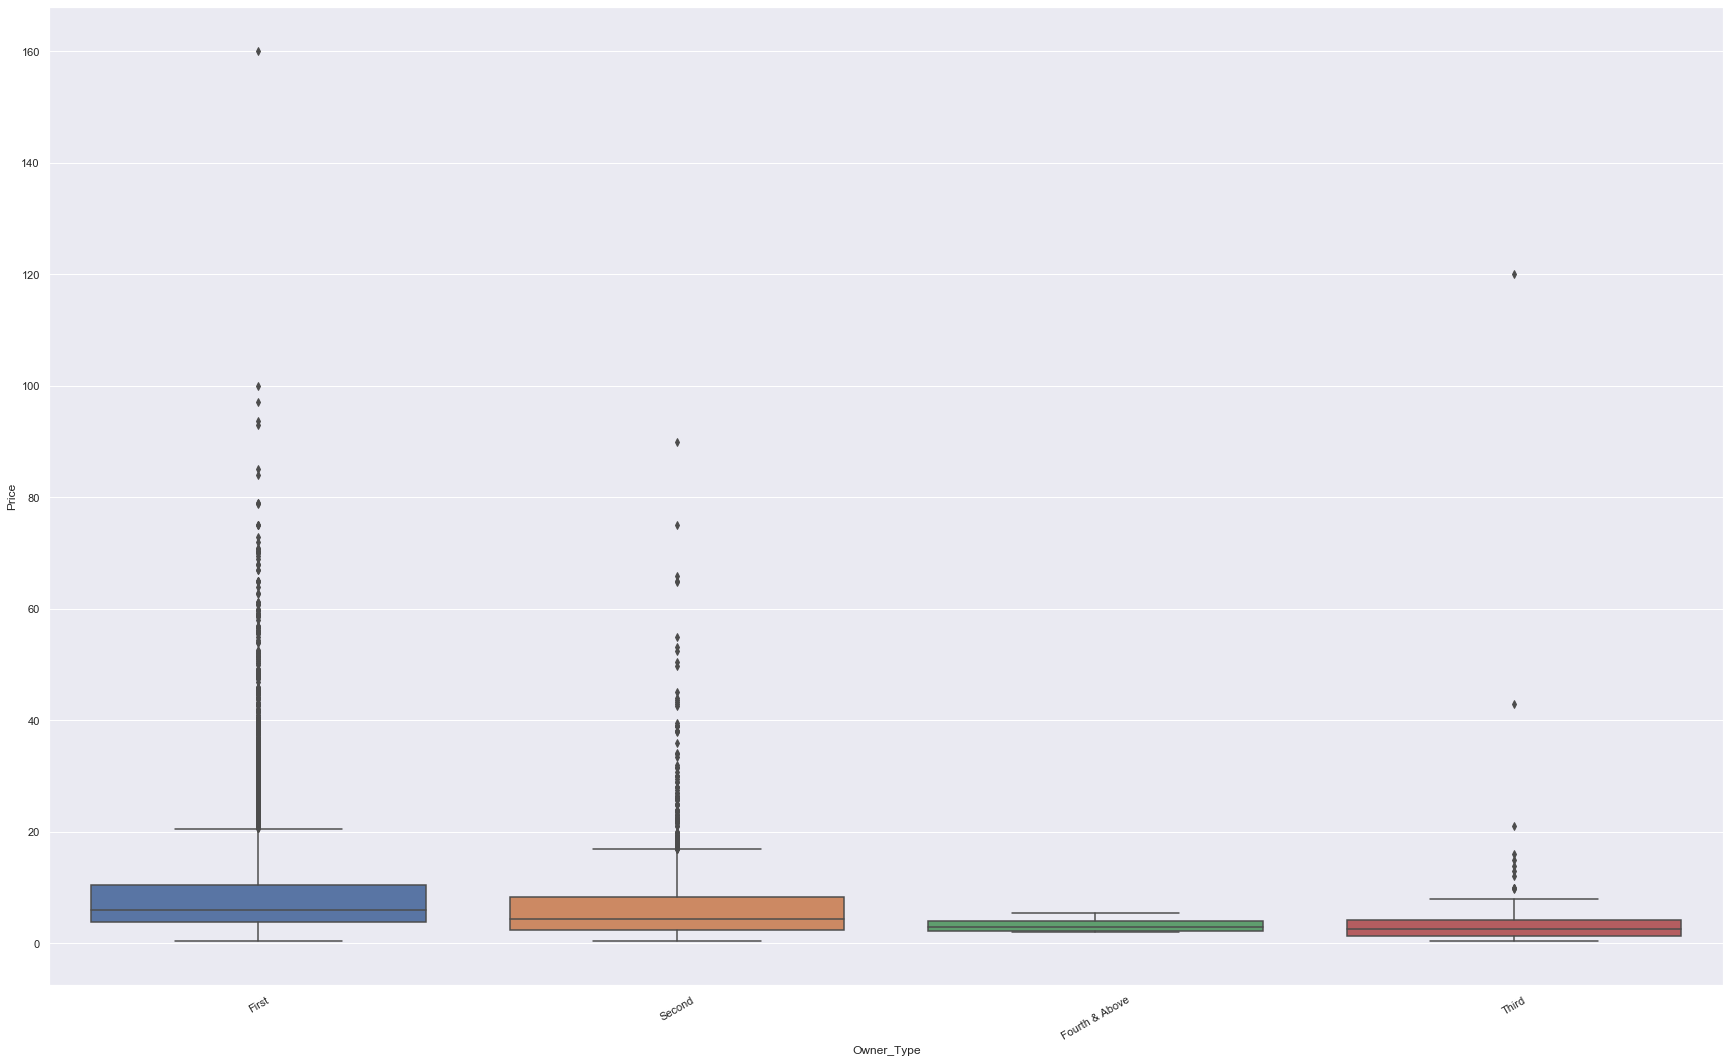

In [13]:
ax = sns.boxplot(x="Owner_Type", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'Manual'), Text(0, 0, 'Automatic')]

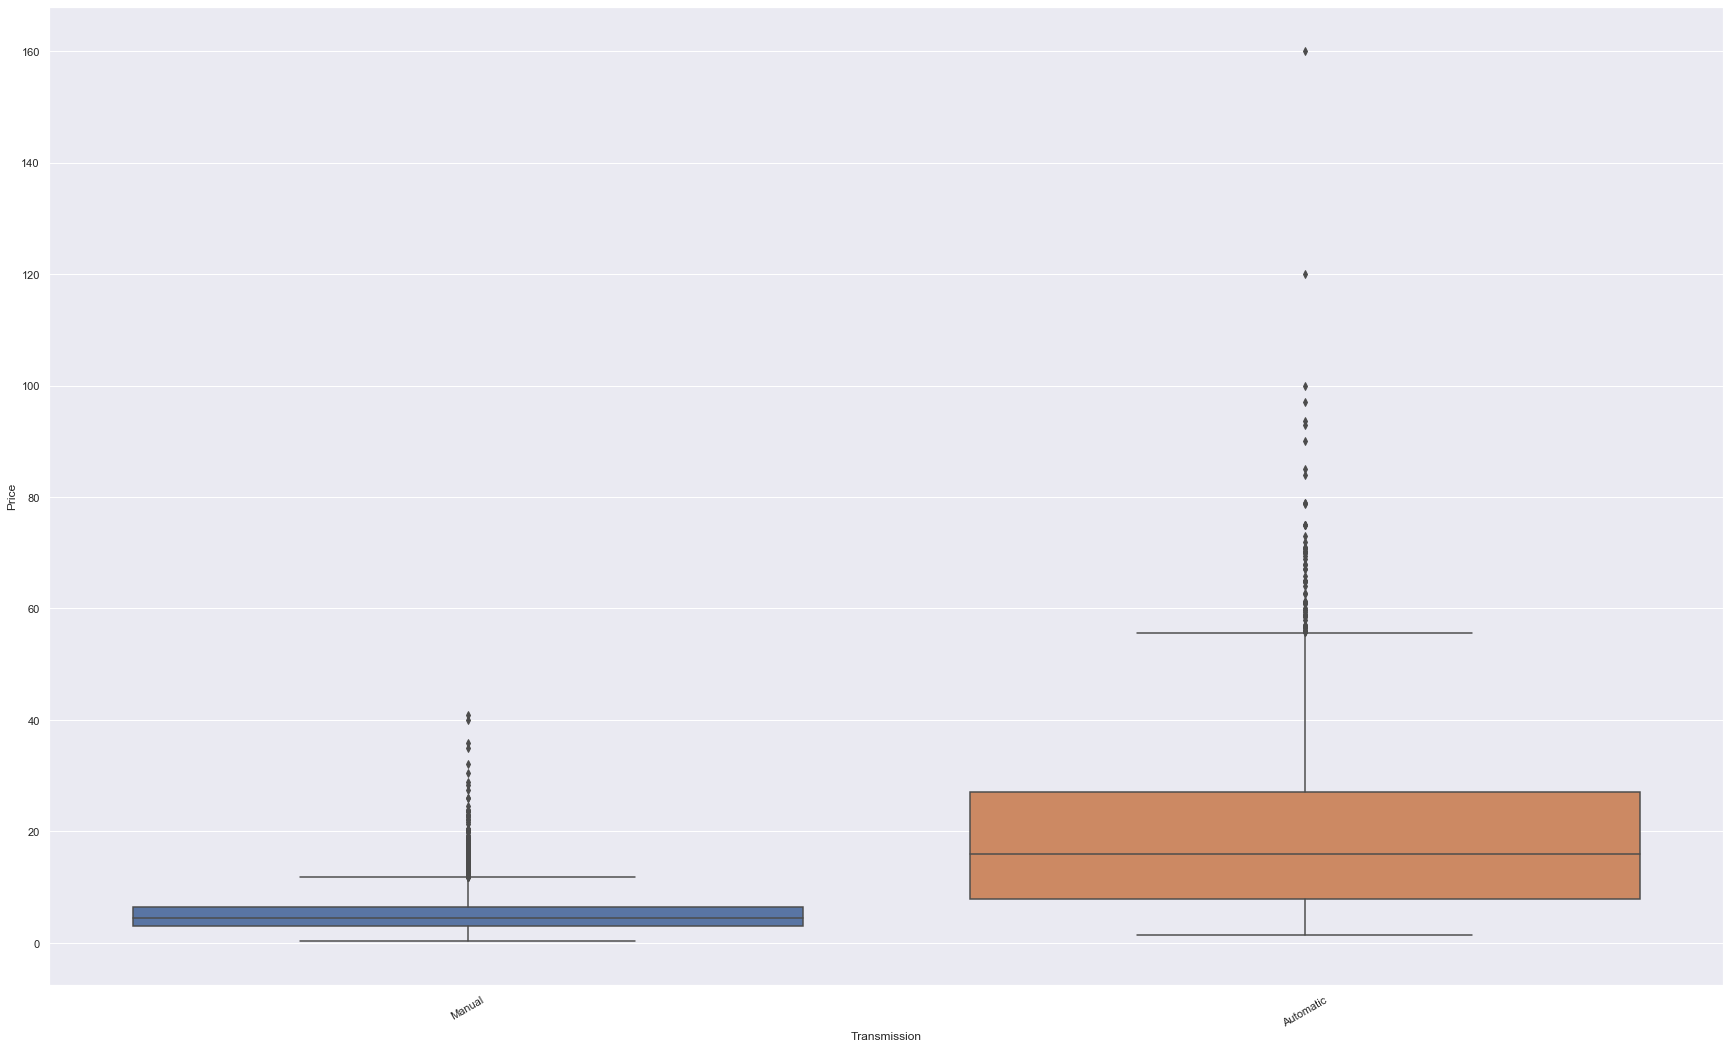

In [14]:
ax = sns.boxplot(x="Transmission", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

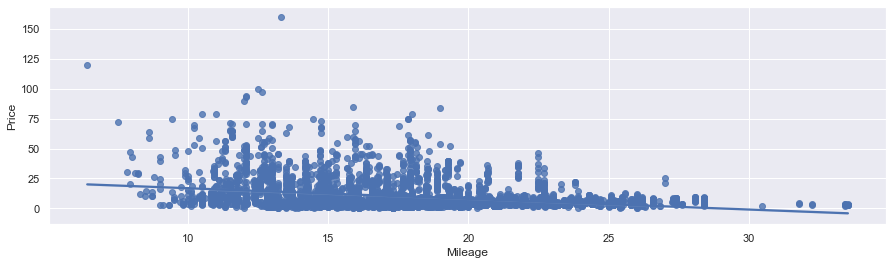

In [15]:
#Mileage vs Price
#this column will require intensive cleanup
mileage = copy_used_cars_data['Mileage']
copy_used_cars_data['Mileage'] = mileage.apply(str)
copy_used_cars_data['Mileage'] = mileage.apply(lambda f: float(first_word(f)))
nonzero_Mileage = (pd.DataFrame(copy_used_cars_data['Mileage']) != 0).any(axis=1)
copy_used_cars_data = copy_used_cars_data.loc[nonzero_Mileage]
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Mileage", y="Price")
#there is very little relationship here

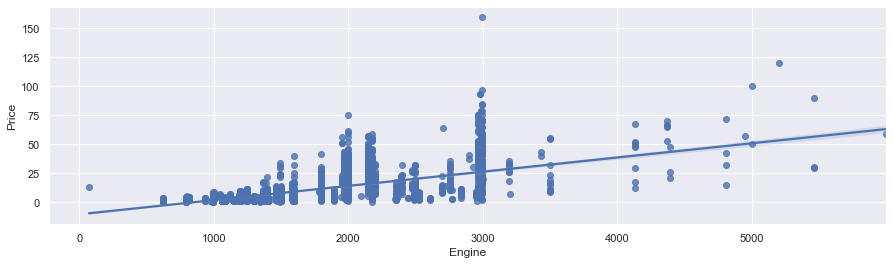

In [16]:
#Engine vs Price
#this column will require intensive cleanup
engine = copy_used_cars_data['Engine']
copy_used_cars_data['Engine'] = engine.apply(str)
copy_used_cars_data['Engine'] = engine.apply(lambda f: float(first_word(f)))
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Engine", y="Price")

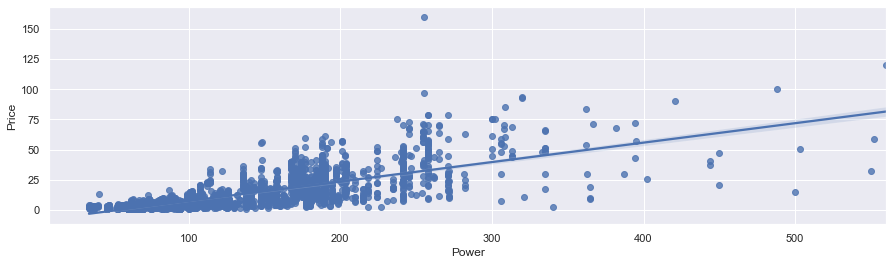

In [17]:
#Power vs Price
def num_there(s):#https://stackoverflow.com/questions/19859282/check-if-a-string-contains-a-number
    return any(i.isdigit() for i in s)
def float_please(f): 
    if(num_there(f)): 
        return float(f)
    return 0
power = copy_used_cars_data['Power']
copy_used_cars_data['Power'] = power.apply(str)
copy_used_cars_data['Power'] = power.apply(lambda F: float_please(first_word(F)))
nonzero_power = (pd.DataFrame(copy_used_cars_data['Power']) != 0).any(axis=1)
copy_used_cars_data = copy_used_cars_data.loc[nonzero_power]
plt.figure(figsize=(15,4))
sns.regplot(data=copy_used_cars_data, x="Power", y="Price")

In [18]:
power_price = copy_used_cars_data.drop(copy_used_cars_data.columns[0:10], axis=1)
power_price = power_price.drop(copy_used_cars_data.columns[11:13], axis=1)
power_price.head()
#power_price.describe()

,Power,Price
0,58.16,1.75
1,126.20,12.50
2,88.70,4.50
3,88.76,6.00
4,140.80,17.74


[Text(0, 0, '2.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0')]

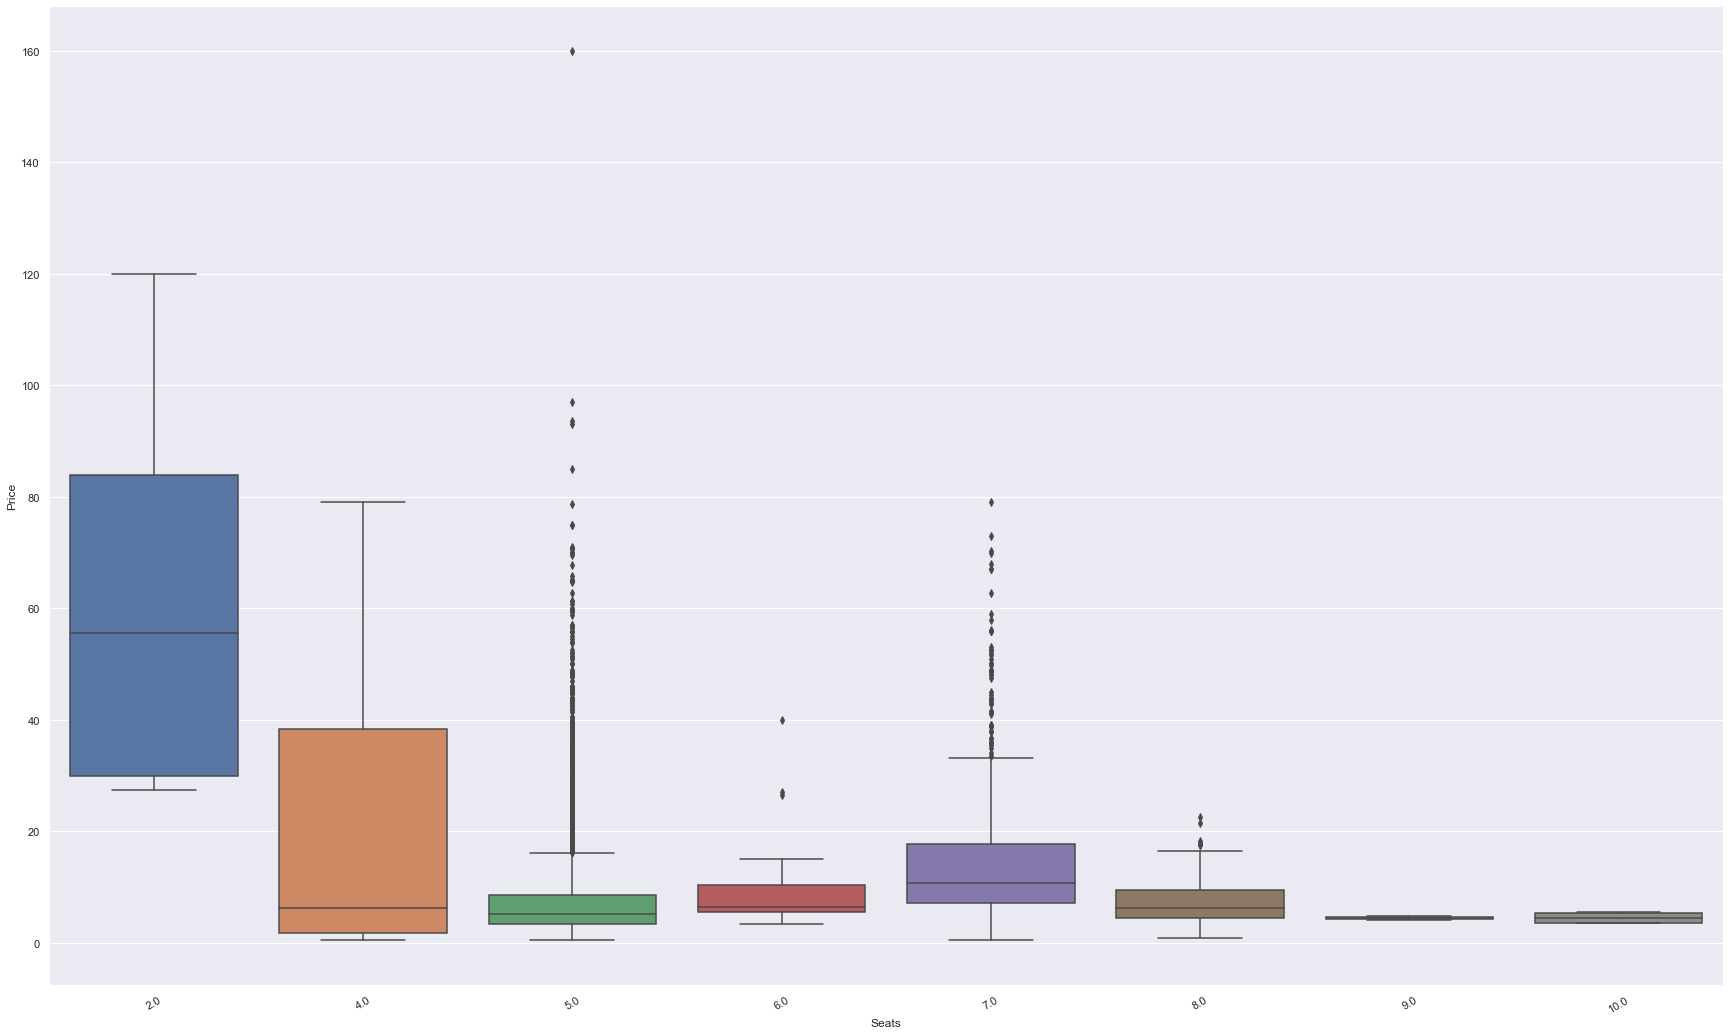

In [19]:
#Seats vs Price
ax = sns.boxplot(x="Seats", 
            y="Price", 
            data=copy_used_cars_data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [23]:
from sklearn.model_selection import train_test_split
y = copy_used_cars_data["Price"]
X = copy_used_cars_data.drop(["Location", "New_Price", "Price"], axis=1)
X_train, X_val, y_train, y_val= train_test_split(X, y,random_state = 0)

In [24]:
# Get list of categorical variables
#https://www.kaggle.com/alexisbcook/categorical-variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Name', 'Fuel_Type', 'Transmission', 'Owner_Type']


In [29]:
X_train.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
count,5281.000000,5281.000000,5281.000000,5280.000000,5281.000000,5281.000000,5281.000000
mean,3621.045257,2013.481159,57104.915168,18.405763,1616.447832,112.441163,5.289150
std,2090.768012,3.147461,37769.635745,4.177890,593.708644,53.505297,0.819214
min,0.000000,1998.000000,171.000000,6.400000,624.000000,34.200000,2.000000
25%,1804.000000,2012.000000,33000.000000,15.400000,1198.000000,75.000000,5.000000
50%,3603.000000,2014.000000,52400.000000,18.490000,1493.000000,93.700000,5.000000
75%,5430.000000,2016.000000,72469.000000,21.100000,1968.000000,138.030000,5.000000
max,7251.000000,2019.000000,775000.000000,33.540000,5998.000000,616.000000,10.000000


In [31]:
y_train.describe() #why are there different counts?

count    4392.000000
mean        9.447634
std        10.840579
min         0.450000
25%         3.500000
50%         5.700000
75%         9.900000
max       120.000000
Name: Price, dtype: float64

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [36]:
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_val = X_val.select_dtypes(exclude=['object'])
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(drop_X_train))
imputed_X_val = pd.DataFrame(my_imputer.transform(drop_X_val))

# Imputation removed column names; put them back
imputed_X_train.columns = drop_X_train.columns
imputed_X_val.columns = drop_X_val.columns
print("MAE from Approach 1 (Drop categorical variables):")
#print(score_dataset(drop_X_train, drop_X_val, y_train, y_val)) <-struggling here with contamination still

MAE from Approach 1 (Drop categorical variables):
